In [2]:
sem = 0
def congruencial_mixto(cantidad, semi=None, a=6364136223846793005, c=1442695040888963407, m=((2 ** 64))):
    global sem
    if semi is not None:
        sem = semi
    numeros = []
    xo = sem
    if cantidad == 1:
        aXi = ( ((a * xo) + c) % m)
        sem = aXi
        return (aXi/m)
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros

In [3]:
from math import exp
def integral(lim_inferior, lim_superior):
    numeros_aleatorios = congruencial_mixto(cantidad=1000)
    result = 0
    for num in numeros_aleatorios:
        num = lim_inferior + (lim_superior - lim_inferior)* num
        result = result + (exp(-(num ** 2)))
    return (result * (lim_superior - lim_inferior)) / len(numeros_aleatorios)

In [4]:
C_k = [1.0]* 30
def calculate_ck():
    global C_k
    for i in range(2, len(C_k)):
        result = 0
        for k in range (0, i):
            result = result + ((C_k[k] * C_k[i - 1 - k])/((k + 1) * (2 * k + 1)))
        C_k[i] = result
        result = 0
calculate_ck()

In [5]:
from math import sqrt
from math import pi
def error_inverse_function(probabilidad):
    result = 0
    for i in range(0, len(C_k)):
        result = result + (C_k[i] * ((probabilidad * sqrt(pi)/2) ** (2 * i + 1)) / (2 * i + 1))
    return result

In [6]:
from math import sqrt
raiz2 = sqrt(2)
# 25, 2.7
def variable_normal(miu=25, sigma=1):
    p = congruencial_mixto(cantidad=1)
    variable_normal = miu + ((sigma * raiz2) *(error_inverse_function(2 * p - 1)))
    return variable_normal

<p>The model uses five parameters:</p>
<p>C_a = thermal capacity of the air in the zone, together with other fast-response elements (kJ/K)</p>
<p>C_w = lumped thermal capacitance of the structure (kJ/K)</p>
<p>K_f = fast conductance ascribed to ventilation, infiltration, and elements with little thermal capacitance,
e.g., windows (kW/K)</p>
<p>K_i = conductance between the air and structure nodes (kW/K)</p>
<p>K_o = conductance between the structure node and the outside air (kW/K)</p>

In [7]:
T_a = [] # air temperature (°C)
T_w = [] # mean wall (structure) temperature (°C)
T_o = [] # outside air temperature (°C)
Q = [] # heat input to the air node (kW)
C_a = 1400 #  thermal capacity of the air in the zone, together with other fast-response elements (kJ/K)
C_w = 2200 # lumped thermal capacitance of the structure (kJ/K)
K_f = 0.01 # fast conductance ascribed to ventilation, infiltration, and elements with little thermal capacitance, e.g., windows (kW/K)
K_i = 1.4 # conductance between the air and structure nodes (kW/K)
K_o = 0.01 # conductance between the structure node and the outside air (kW/K)
T = 1
def simulacion():
    pass

Qi = M a Cp ( Ts – Ta )[kW] <br>
where <br>
Ma = supplied air mass flow rate (kg/s) <br>
Cp = specific heat of air (kJ/kg/K) <br>
Ts = supplied air temperature (°C) <br>

In [8]:
def heat_input_i(M_a, C_p, T_s, T_a):
    # M_a supplied air mass flow rate (kg/s)
    # C_p specific heat of air (kJ/kg/K)
    # T_s supplied air temperature 
    # T_a air temperature 
    return (M_a * C_p * (T_s - T_a))

The casual gain (Qc) was considered as a boundary variable during the occupied hours:  <br>
Qc = Fc ⋅ 1.0 [kW] <br>
where <br>
Fc = casual gain factor <br>


In [9]:
def heat_input_c(F_c):
    # The casual gain (Qc) was considered as a boundary variable during the occupied hours:
    # F_c = casual gain factor
    return (F_c * 1.0)

<p>The solar gain (Qs) was treated as a gain factor relating the gain to the zone to the global solar
radiation intensity on the horizontal:</p>
Qs = F sIgh [kW] <br>
where  <br>
Fs = solar gain factor <br>
Igh = global horizontal solar incidence (kW/m2) <br>


In [10]:
def heat_input_s(F_s, I_gh):
    # The solar gain (Qs) was treated as a gain factor relating the gain to the zone to the global solar radiation intensity on the horizontal:
    # F_s = solar gain factor
    # I_gh = global horizontal solar incidence (kW/m2)
    return (F_s * I_gh)

In [11]:
def heat_input():
    global Q
    pass

In [12]:
def outside_air_temperature():
    global T_o
    #T_o.append(variable_normal())
    T_o.append(32)

In [17]:
def air_temperature(t):
    global T_a, T_w, Q, T_o, T, K_i, K_f, C_a, pot_var, max_pot, T_AMBIENTE, P_GANANCIA_TEMPERATURA, GRADOS_ACEPTACION, T_IDEAL
    T_o.append(T_AMBIENTE)
    _Q = pot_var + heat_input_c(P_GANANCIA_TEMPERATURA) + heat_input_s(0, 0)
    while (pot_var <= 0 and pot_var >= max_pot):
        Temperature = T_a[t-1] + (T * (_Q - K_i * (T_a[t-1] - T_w[t-1]) - K_f * (T_a[t-1] - T_o[t-1])) / C_a)
        if T_a[t-1] >= (T_IDEAL - GRADOS_ACEPTACION) and  T_a[t-1] <=(T_IDEAL + GRADOS_ACEPTACION):
            pot_var = 0
            _Q = pot_var + heat_input_c(P_GANANCIA_TEMPERATURA) + heat_input_s(0, 0)
            break
        if Temperature > (T_IDEAL + GRADOS_ACEPTACION):
            pot_var = pot_var - 0.01
            _Q = pot_var + heat_input_c(P_GANANCIA_TEMPERATURA) + heat_input_s(0, 0)
            if pot_var<max_pot:
                pot_var = max_pot
                break
        elif Temperature < T_IDEAL:
            pot_var = pot_var + 0.1
            if pot_var > 0:
                pot_var = 0
            _Q = pot_var + heat_input_c(P_GANANCIA_TEMPERATURA) + heat_input_s(0, 0)
            break
        elif Temperature <=(T_IDEAL + GRADOS_ACEPTACION):
            pot_var = pot_var - 0.01
            if pot_var<max_pot:
                pot_var = max_pot
            _Q = pot_var + heat_input_c(P_GANANCIA_TEMPERATURA) + heat_input_s(0, 0)
            break
        else:
            pot_var = 0
            _Q = pot_var + heat_input_c(P_GANANCIA_TEMPERATURA) + heat_input_s(0, 0)
            break
    Q.append(_Q)
    potencia.append(pot_var)
    T_ideal.append(T_IDEAL)
    T_a.append(T_a[t-1] + (T * (Q[t-1] - K_i * (T_a[t-1] - T_w[t-1]) - K_f * (T_a[t-1] - T_o[t-1])) / C_a))

In [18]:
def wall_temperature(t):
    global T_a, T_w, K_i, K_o, T_o, C_w 
    T_w.append(T_w[t-1] + (T * (K_i * (T_a[t-1] - T_w[t-1]) - K_o * (T_w[t-1] - T_o[t-1])) / C_w))

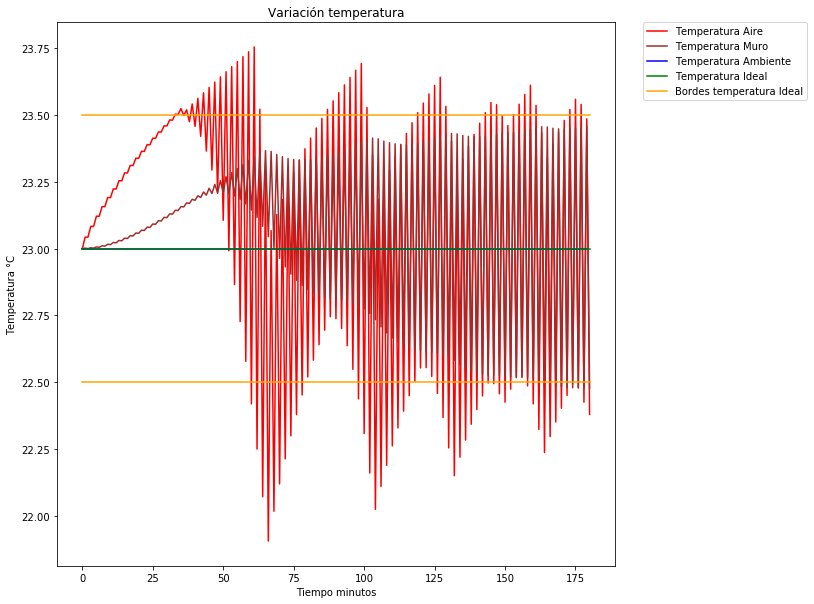

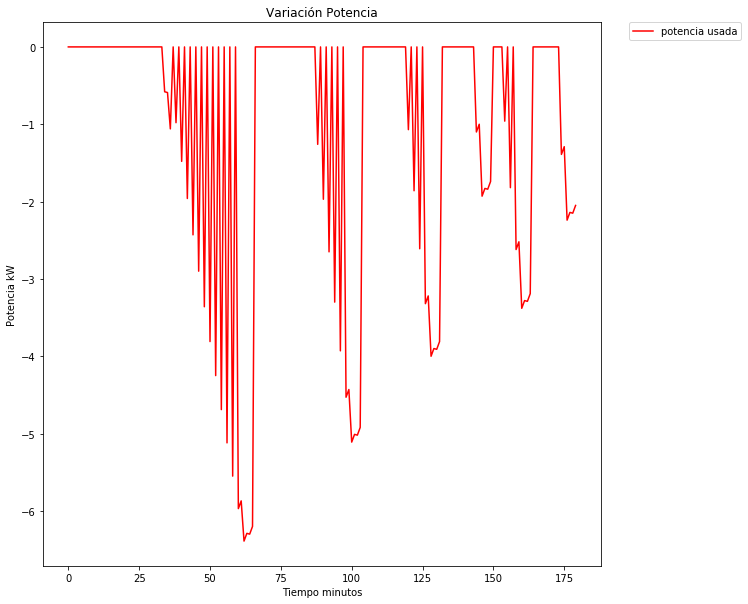

-2.049999999999996


In [54]:
T_a = []
T_w = []
T_o = []
T_ideal = []
potencia = []
T_IDEAL = 23.0
T_AMBIENTE = 23
T_MURO = 23
P_GANANCIA_TEMPERATURA = 1
GRADOS_ACEPTACION = 0.5
max_pot = -10.25
pot_var = -0.01
global max_pot, pot_var
Q = []
T_a.append(T_AMBIENTE)
T_w.append(T_MURO)
T_ideal.append(T_IDEAL)
T = 60 #Tiempo muestreo segundos
for i in range(0, 180):
    air_temperature(i)
    wall_temperature(i)
from matplotlib import pylab as plt
plt.figure(figsize=(10, 10))
plt.title('Variación temperatura')
plt.ylabel('Temperatura °C')
plt.xlabel('Tiempo minutos')
plt.plot(T_a, color='red', label="Temperatura Aire")
plt.plot(T_w, color='brown', label="Temperatura Muro")
plt.plot(T_o, color='blue', label="Temperatura Ambiente")
plt.plot(T_ideal, color='green', label="Temperatura Ideal")
plt.plot([T_IDEAL + GRADOS_ACEPTACION]*len(T_ideal), color='orange', label="Bordes temperatura Ideal")
plt.plot([T_IDEAL - GRADOS_ACEPTACION]*len(T_ideal), color='orange',)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.figure(figsize=(10, 10))
plt.title('Variación Potencia')
plt.ylabel('Potencia kW')
plt.xlabel('Tiempo minutos')
plt.plot(potencia, color='red', label="potencia usada")
#plt.plot(Q, color='blue', label="valor Q")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print (pot_var)

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Las dos líneas siguientes son necesaias para hacer 
# compatible el interfaz Tkinter con los programas basados 
# en versiones anteriores a la 8.5, con las más recientes. 

from tkinter import *    # Carga módulo tk (widgets estándar)
from tkinter import ttk  # Carga ttk (para widgets nuevos 8.5+)

# Define la ventana principal de la aplicación

raiz = Tk()

# Define las dimensiones de la ventana, que se ubicará en 
# el centro de la pantalla. Si se omite esta línea la
# ventana se adaptará a los widgets que se coloquen en
# ella. 

raiz.geometry('300x200') # anchura x altura

# Asigna un color de fondo a la ventana. Si se omite
# esta línea el fondo será gris

raiz.configure(bg = 'beige')

# Asigna un título a la ventana

raiz.title('Aplicación')

# Define un botón en la parte inferior de la ventana
# que cuando sea presionado hará que termine el programa.
# El primer parámetro indica el nombre de la ventana 'raiz'
# donde se ubicará el botón

ttk.Button(raiz, text='Salir', command=quit).pack(side=BOTTOM)

# Después de definir la ventana principal y un widget botón
# la siguiente línea hará que cuando se ejecute el programa
# construya y muestre la ventana, quedando a la espera de 
# que alguna persona interactúe con ella.

# Si la persona presiona sobre el botón Cerrar 'X', o bien,
# sobre el botón 'Salir' el programa llegará a su fin.

raiz.mainloop()